In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def resize(image, width=None, height=None, inter=cv2.INTER_AREA):
    """
    Función que cambia el tamaño de una imagen preservando la relación de aspecto.
    :param image: Imagen a ser alterada.
    :param width: Ancho objetivo (opcional).
    :param height: Altura objetivo (opcional).
    :param inter: Método de interpolación (por defecto: cv2.INTER_AREA)
    :return: Imagen redimensionada. Se le da prioridad a *height*, por lo que si se especifican tanto *width*
             como *height*, *width* será ignorado.
    """
    # Extraemos las dimensiones originales.
    (original_height, original_width) = image.shape[:2]

    # Si no se especifica al menos uno de los parámetros, no tenemos nada que hacer aparte de retornar.
    if width is None and height is None:
        return image

    # Si el nuevo ancho es vacío (*width*), calcularemos la relación de aspecto con base a la nueva altura (*height*)
    if width is None:
        # Proporción para mantener la relación de aspecto con base a la nueva altura.
        ratio = height / float(original_height)

        # Nueva anchura
        width = int(original_width * ratio)
    else:
        # Proporción para mantener la relación de aspecto con base a la nueva anchura.
        ratio = width / float(original_width)

        # Nueva altura
        height = int(original_height * ratio)

    # El nuevo tamaño de la imagen no será más que un par compuesta por la nueva anchura y la nueva altura.
    new_size = (width, height)

    # Usamos la función cv2.resize() para llevar a cabo el cambio de tamaño de la imagen; finalmente retornamos el
    # resultado.
    return cv2.resize(image, new_size, interpolation=inter)

In [4]:
ruta = path_to_images
contador = os.listdir(ruta)
output = path_to_deploy_results

In [5]:
path1 = Image_of_example
img1 = cv2.imread(path1)
#This cvt color change is just for the matplotlib show function
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

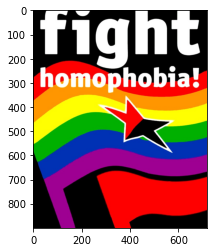

(900, 720)

In [6]:
# Original resolution
# plt.xticks([]), plt.yticks([])
plt.imshow(img1)
plt.show()
img1.shape[:2]

In [7]:
# Modify the height keeping the ratio
resized = resize(img1, height=1080)
resized.shape[:2]

(1080, 864)

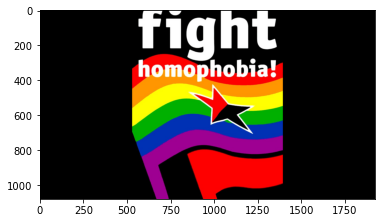

(1080, 1920)

In [8]:
# Add the borders to complete the 1920x1080 resolution
# If the picture is lager than 1920 see below in the last for bucle
x = int((1920 - resized.shape[:2][1])/2)
# Border color
color = [0, 0, 0]
borderoutput = cv2.copyMakeBorder(
                resized, 
                0, #Arriba
                0, #Abajo
                x, #Izquierda
                x, #Derecha
                cv2.BORDER_CONSTANT, value=color
            )
plt.imshow(borderoutput)
plt.show()
borderoutput.shape[:2]

In [9]:
# For a lot of images you can do it with this
# for i in contador:
#     try:
#         nombre = ruta + i
#         filename = output + i
#         img = cv2.imread(nombre)
#         resized = resize(img, height=1080)
#         cv2.imwrite(filename, resized)
#     except:
#         pass

In [10]:
# for i in contador:
#     try:
#         filename = output + i
#         img = cv2.imread(filename)
#         x = int((1920 - img.shape[:2][1])/2)
#         color = [0, 0, 0]
#         if img.shape[:2][1] > 1920:
#             img = resize(img, width=1920)
#             y = int((1080 - img.shape[:2][0])/2)
#             borderoutput = cv2.copyMakeBorder(
#             img, 
#             y, #Arriba
#             y, #Abajo
#             0, #Izquierda
#             0, #Derecha
#             cv2.BORDER_CONSTANT, value=color
#             )
#         else:
#             borderoutput = cv2.copyMakeBorder(
#                 img, 
#                 0, #Arriba
#                 0, #Abajo
#                 x, #Izquierda
#                 x, #Derecha
#                 cv2.BORDER_CONSTANT, value=color
#             )
#         cv2.imwrite(filename, borderoutput)
#     except:
#         print(i,'It's not a image xD')